# NMF 3D

### Tridimensional Normal Mode Functions

About the software:
 - works with both python 2 and 3
 - Numpy and Scipy are required; netCDF4 is recommended
 

References:
 - P. N. Swarztrauber and A. Kasahara (1985). The vector harmonic analysis of Laplace's tidal equations, SIAM J. Sci. Stat. Comput, 6(2), 464-491. doi: 10.1137/0906033

 - A. Kasahara (1976). Normal modes of ultralong waves in the atmosphere, Mon. Weather Rev., 104(6), 669-690. doi: 10.1175/1520-0493(1976)104<0669:NMOUWI>2.0.CO;2

 - Y. Shigehisa (1983). Normal Modes of the Shallow Water Equations for Zonal Wavenumber Zero,
 J. Meteorol. Soc. Jpn., 61(4), 479-493. doi: 10.2151/jmsj1965.61.4_479

 - A. Kasahara (1978). Further Studies on a Spectral Model of the Global Barotropic Primitive Equations with Hough Harmonic Expansions, J. Atmos. Sci., 35(11), 2043-2051. doi: 10.1175/1520-0469(1978)035<2043:FSOASM>2.0.CO;2
 
 
 
 <div style='border: 3px solid red; color:red'>missing ref Kasahara (1984) ! see vertical_structure.stability </div>

### 1st step: calculate vertical space/time mean profile of temperature from a global dataset

Folder data (nmf3d.datafolder) contains a some ERA-INTERIM temperature files that can be used. These are very low space/time resolution files just for testing.

In [1]:
import nmf3d
f=nmf3d.datafolder+'/T*.nc'

import os, glob
files=glob.glob(f)
files.sort()
for f in files:
    print('%s %.1fMb'%(os.path.basename(f),os.stat(f).st_size/1024**2))

T_01_1978_.nc 5.0Mb
T_08_1978_.nc 5.0Mb


 - level 0 of 10
 - level 1 of 10
 - level 2 of 10
 - level 3 of 10
 - level 4 of 10
 - level 5 of 10
 - level 6 of 10
 - level 7 of 10
 - level 8 of 10
 - level 9 of 10


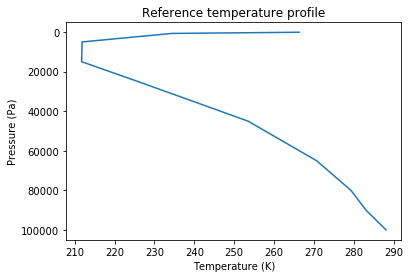

In [2]:
t,lev_mb=nmf3d.calcs.profile(files)
lev=lev_mb*100 # Pa
%matplotlib inline
import pylab as pl
pl.plot(t,lev)
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)')
pl.title('Reference temperature profile')
pl.gca().invert_yaxis()

calcs.profile accepts input arguments other than data filenames: the names of the lon, lat, z variables and options to refine lon, lat data using splines. Ex.: 


 - level 0 of 10
 - level 1 of 10
 - level 2 of 10
 - level 3 of 10
 - level 4 of 10
 - level 5 of 10
 - level 6 of 10
 - level 7 of 10
 - level 8 of 10
 - level 9 of 10


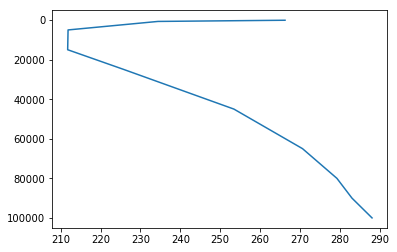

In [3]:
t,lev_mb=nmf3d.calcs.profile(files,xname='longitude',xmeth='spline')
lev=lev_mb*100
pl.plot(t,lev)
pl.gca().invert_yaxis()

Let's compare with more realistic data (30 years of ERA Interim data with spatial resolution of 1.5, available in data folder):

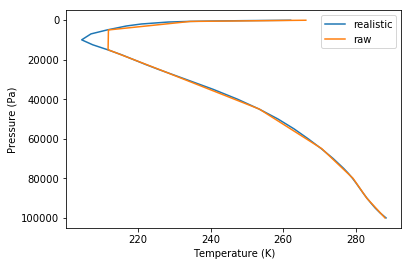

In [4]:
f=nmf3d.datafolder+'/T_ERA_I_1979_2010.txt'
import numpy as np
T,Lev=np.loadtxt(f)
pl.plot(T,Lev,label='realistic')
pl.plot(t,lev,label='raw')
pl.legend()
pl.gca().invert_yaxis()
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)')

### 2nd step: calculate the vertical structure equation

The vertical structure is calculated from a reference temperature profile (temperature and the corresponding pressure levels, obtained in 1st step)

saving out_vs_nleg57_ws0False.nc
((37,), (37, 113), array([  9.89956394e+03,   6.11530428e+03,   2.71470276e+03,
         1.28358949e+03,   6.66221695e+02,   3.98093283e+02,
         2.57943418e+02,   1.71175324e+02,   1.23830115e+02,
         9.05289979e+01,   6.52226011e+01,   4.89298557e+01,
         3.78287772e+01,   2.97161227e+01,   2.34902859e+01,
         1.85894736e+01,   1.47233969e+01,   1.17016615e+01,
         9.30444177e+00,   7.52520612e+00,   6.13441454e+00,
         5.04548695e+00,   4.20398116e+00,   3.53462813e+00,
         3.00045173e+00,   2.54669873e+00,   2.16490871e+00,
         1.84379510e+00,   1.57471211e+00,   1.34753232e+00,
         1.15749276e+00,   9.98902566e-01,   8.66748591e-01,
         7.55135874e-01,   6.60927690e-01,   5.82010448e-01,
         5.14678328e-01]))


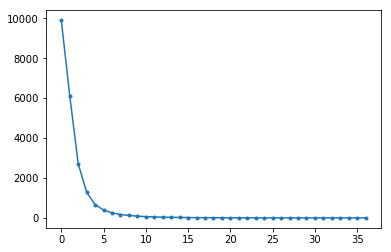

In [5]:
Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev) # returns the vertical structure functions
                                                # and the equivalent heights
print(hk.shape, Gn.shape, hk)
pl.plot(hk,marker='.')

By default a netcdf file with vse output is created. The options regarding this output file creations are:

 - save, save output to a file, True
 - format, output file format: npz or netcdf (default)

There are other important options:
- ws0, pressure vertical velocity zero at surface, False by default
- n_leg, number of Legendre polynomials to use, len(data)+20 by default

Let us now check te contents of the output netcdf file and then test the ws0 option:

 <div style='border: 3px solid red; color:red'>CECK long_name in variables Gn and hk! </div>

In [6]:
nmf3d.calcs.ncshow('out_vs_nleg57_ws0False.nc')


# Contents of the NetCDF file
   out_vs_nleg57_ws0False.nc

:: Global Attributes:
   date  2017-07-24 11:03:50.654397
   ws0   False                     

:: Dimensions:
   n_leg   57
   GL     113

:: Variables:
                 long_name              units      shape  
   Gn | Vertical structure functions |         | (57, 113) |
   hk | Equivalent heights           |         | (57,)     |


In [7]:
Gn,hk,fname=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
print(hk)

saving out_vs_nleg57_ws0True.nc
[             inf   6.41440549e+03   2.78902424e+03   1.30045988e+03
   6.73503983e+02   4.02637644e+02   2.60347760e+02   1.72641016e+02
   1.24818417e+02   9.08828920e+01   6.53845605e+01   4.90581868e+01
   3.79207543e+01   2.97765454e+01   2.35242344e+01   1.86113727e+01
   1.47376884e+01   1.17108805e+01   9.31077741e+00   7.52973386e+00
   6.13734717e+00   5.04756621e+00   4.20547521e+00   3.53577676e+00
   3.00131784e+00   2.54732811e+00   2.16539123e+00   1.84416686e+00
   1.57499005e+00   1.34774250e+00   1.15765567e+00   9.99025605e-01
   8.66841142e-01   7.55206264e-01   6.60981316e-01   5.82052736e-01
   5.14712787e-01]


Note that if ws0 is True, the first hk is infinite, as expected

### 3rd step: calculate the Hough vector functions

Hough vector functions as described in Swarztrauber and Kasahara (1985)

Part I: The frequencies and the Hough functions are computed for zonal wave number m = 0

Part II: The frequencies and the Hough functions are computed for zonal wave numbers m > 0

Inputs:
 - equivalent eights
 - M, maximum zonal wave number used in the expansion: m=0,1,...,M
 - nLR, total number of (west) Rossby modes used in the expansion (should be even)
 - nLG , half the number of Gravity modes used in the expansion (should be even)
 - latType, latitude type: linear (default, equally spaced) or gaussian
  
The total number of the Gravity modes will be 2*nLG=nLG(east gravity)+nLG(west gravity)

Other important inputs (kargs):
  - dlat, latitude spacing if latType is linear (default is 1.5, ie, 121 points) or number of gaussian lats if latType is gaussian (default is 128, corresponding to a spectral truncature of T85)
  - save, create file [True]
  - format, file format: [nc] or npz

In [8]:
nk=5 # number of function to keep
hk=hk[:nk]
nmf3d.hough_functions.hvf(hk,M=6,nLR=8,nLG=6);

- HVF baroclinic -
Part I
  - Matrix C
  - Matrix D
  - Matrix E
  - Matrix F
  - Coeffs An, Bn, Cn
  - Normalized Associated Legendre Functions - M=0
  - Normalized Associated Legendre Functions - M=1
  - HVF: gravity modes
  - HVF: rossby modes
End of part I (zonal wave number zero)
Part II
  1 of 6
  - Matrix A
  - Matrix B
  - selecting freqs and coeffs
  - Associated Legendre Functions
  - spherical vector harmonics
  - HVF: gravity
  - HVF: rossby
  2 of 6
  3 of 6
  4 of 6
  5 of 6
  6 of 6
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH4_dlat1.5linear_baroclinic.nc
- HVF barotropic -
Part I
End of part I (zonal wave number zero)
Part II
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH1_dlat1.5linear_barotropic.nc


Note that two files (baroclinic and barotropic) are saved since hk[0] is infinite (i.e., ws0 is True in the computation of the vertical structure). If not, both modes will be in the same file. Ex.:

In [9]:
Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev,ws0=False)
out=nmf3d.hough_functions.hvf(hk[:5],M=6,nLR=8,nLG=6,dlat=6)
hfile=out[-1] # will be needed later

#  ************ Important ************
# dlat was set to 6 because the output file will be used in the
# next step together with some ERA-Interim raw data where latitude
# spacing is 6deg.

saving out_vs_nleg57_ws0False.nc
- HVF baroclinic -
Part I
  - Matrix C
  - Matrix D
  - Matrix E
  - Matrix F
  - Coeffs An, Bn, Cn
  - Normalized Associated Legendre Functions - M=0
  - Normalized Associated Legendre Functions - M=1
  - HVF: gravity modes
  - HVF: rossby modes
End of part I (zonal wave number zero)
Part II
  1 of 6
  - Matrix A
  - Matrix B
  - selecting freqs and coeffs
  - Associated Legendre Functions
  - spherical vector harmonics
  - HVF: gravity
  - HVF: rossby
  2 of 6
  3 of 6
  4 of 6
  5 of 6
  6 of 6
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc


Let us take a look at the file contents:

In [10]:
nmf3d.calcs.ncshow(hfile,Lmax=40)
# remove the Lmax option to see te entire variables' long_name


# Contents of the NetCDF file
   out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc

:: Global Attributes:
   date  2017-07-24 11:03:58.735056

:: Dimensions:
   components_uvz                    3
   max_zonal_wave_number             6
   number_meridional_modes          20
   lat                              31
   number_equivalent_heights         5
   quarter_number_gravitical_modes   3
   half_number_rossby_modes          4
   Np1                               4

:: Variables:
                                     long_name                    units          shape      
   HOUGH_UVZ_real   | hough functions - eddies (real)          |         | (3, 6, 20, 5, 31) |
   HOUGH_UVZ_imag   | hough functions - eddies (imag)          |         | (3, 6, 20, 5, 31) |
   HOUGH_0_UVZ_real | hough functions - zonal mean (real)      |         | (3, 20, 5, 31)    |
   HOUGH_0_UVZ_imag | hough functions - zonal mean (imag)      |         | (3, 20, 5, 31)    |
   WEST_G_sy        | frequencies of the

### 4th step:   Compute the 3-D spectrum of total energy E_nlk

i.e., te Vertical, Fourier and Hough transforms of zonal and meridional wind, and geopotential perturbation (from the reference geopotential)
  
Inputs:
 - vfile,  equivalent heights and vertical structure functions (output file from step 2)
 - hfile, Hough functions (output file from step 3)
 - data: u,v,geopotential data. This must be a dictionary with fields u, v and z. Each item is a dictionary with fields lon, lat, P (pressure levels) and v (the u, v or geopotential)
 
Other inputs (kargs):
 - save, create file [True]
 - format, file format: [nc] or npz

The module enlk includes example functions to load data from ERA-Interim. The functions can be easily converted to load data from other datasets. The loading of the data will now be explained using (low space/time resolution) ERA-Interim files present in foder data.

#### i) loading data

In [11]:
import netCDF4
fu=nmf3d.datafolder+'/u_01_1979_.nc'
fv=nmf3d.datafolder+'/v_01_1979_.nc'
fz=nmf3d.datafolder+'/Z_01_1979_.nc'

data_u={}
data_v={}
data_z={}

# Let us start with u:
nc=netCDF4.Dataset(fu)
data_u['P']=nc.variables['lev'][:].astype('d')
data_u['lon']=nc.variables['lon'][:].astype('d')
data_u['lat']=nc.variables['lat'][:][::-1].astype('d') # reverse to have -90:90
data_u['v']=nc.variables['var131'][:][:,:,::-1,:].astype('d') # also reverse due to lat
nc.close()

# do the same thing with v (actually lon, lat and P are only needed inside data_u)
nc=netCDF4.Dataset(fv)
data_v['v']=nc.variables['var132'][:][:,:,::-1,:].astype('d') 
nc.close()

The geopotential is a bit more complex as the reference profile must be subtracted. The profile can be obtained following step 1. So let us do this first:

 - level 0 of 10
 - level 1 of 10
 - level 2 of 10
 - level 3 of 10
 - level 4 of 10
 - level 5 of 10
 - level 6 of 10
 - level 7 of 10
 - level 8 of 10
 - level 9 of 10


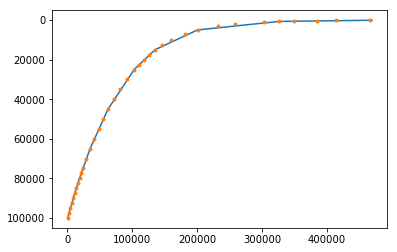

In [12]:
files=nmf3d.datafolder+'/Z*'
Z,Zlev=nmf3d.calcs.profile(files,xname='lon',yname='lat',zname='lev')
pl.plot(Z,Zlev)
pl.gca().invert_yaxis()
Zref=Z.astype('d') # for later use

# now let's save this data for future use:
np.savetxt(nmf3d.datafolder+'/PHI_raw.txt',[Zref,Zlev])
# data folder also includes a realistic geopotential profile from ERA-Interim:
f=nmf3d.datafolder+'/PHI_ERA_I_1979_2010.txt'
Z_,z_=np.loadtxt(f)
pl.plot(Z_,z_,'.')

Now let us load the geopotential subtracting the reference. Note that some datasets provide not the geopotential but the geopotential height. In such case it must be divided by g.

In [13]:
# Load geopotential:
nc=netCDF4.Dataset(fz)
z=nc.variables['var129'][:][:,:,::-1,:].astype('d')
nc.close()

# convert from geoptential height if needed:
# import const
# z/=const.g

# subtract the reference profile:
for i in range(z.shape[1]): z[:,i,:,:]-=Zref[i]

data_z['v']=z

Now we join all the data needed in a dictionary

In [14]:
data=dict(u=data_u,v=data_v,z=data_z)

A similar code is in module enlk so that loading the data could be done simply as:

In [15]:
data=nmf3d.enlk.load_ERA_I(fu,fv,fz,nmf3d.datafolder+'/PHI_raw.txt',height=False)

loading u : /home/mma/software/miniconda2/lib/python2.7/site-packages/nmf3d/data/u_01_1979_.nc
    - loading var131
loading v : /home/mma/software/miniconda2/lib/python2.7/site-packages/nmf3d/data/v_01_1979_.nc
    - loading var132
loading z : /home/mma/software/miniconda2/lib/python2.7/site-packages/nmf3d/data/Z_01_1979_.nc
    - loading var129
    - subtracting reference


#### ii) E_nlk

In [16]:
vfile='out_vs_nleg57_ws0False.nc'
hfile='out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc'
w_nlk,w_0lk,fsave=nmf3d.enlk.project(vfile,hfile,data)

 - loading parameters from Hough functions file:
    out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc
 - loading vertical structure functions:
    out_vs_nleg57_ws0False.nc
 WHAT if ws0??? ---> hk[1:nk]??
 - zonal wind - interpolate p to sigma
 - zonal wind - vertical transform
 - zonal wind - Fourier transform
 - meridional wind - interpolate p to sigma
 - meridional wind - vertical transform
 - meridional wind - Fourier transform
 - geopotential - interpolate p to sigma
 - geopotential - vertical transform
 - geopotential - Fourier transform
 - loading Hough vector functions
What if not linear ??????
saving out_enlk.nc


An output file was created. Let's check it:
 <div style='border: 3px solid red; color:red'>missing log_names </div>

In [18]:
nmf3d.calcs.ncshow(fsave)


# Contents of the NetCDF file
   out_enlk.nc

:: Global Attributes:
   date  2017-07-24 11:04:21.200011

:: Dimensions:
   number_equivalent_heights   5
   max_zonal_wave_number       6
   total_meridional_modes     20
   time                       31

:: Variables:
                  long_name       units        shape     
   w_nlk_real | TODO...        |         | (5, 6, 20, 31) |
   w_nlk_imag | TODO...        |         | (5, 6, 20, 31) |
   w_0lk_real | TODO...        |         | (5, 20, 31)    |
   w_0lk_imag | TODO...        |         | (5, 20, 31)    |


#### iii) Making some plots....
 <div style='border: 3px solid red; color:red'>TODO !! </div>

In [20]:
print w_nlk.shape

(5, 6, 20, 31)
